In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data


files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
  

prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    #priceData = get_price_data(param)
    #stock = StockDataFrame.retype(priceData)
    #price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #stock.get(string)
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    price=price.drop(['Unnamed: 0'],axis=1)
   
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    print(file)
    prices.append(price)

AAPL
AMZN
PEP
GOOGL
MSFT
FB
INTC
CSCO
CMCSA
NVDA
NFLX
BKNG
ADBE
AMGN
TXN
AVGO
PYPL
GILD
COST
QCOM


In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt

Working on... AAPL
4.883029404294328
0.0
Diff in tren train and test
0.5173528777753826
0.5280414150129422
F1,score 0.5909732016925247
G-score: 0.4475047284791613
Accuracy 0.4995685936151855
Window: 4
[[160 387]
 [193 419]]
Vol pos 0.32882063818067825
Vol neg 0.3328766129577181


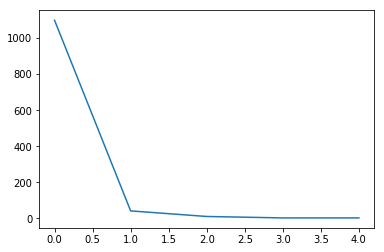

Real Percentage of gain: 2.7058395660247934
Percentage of gain: -0.0023134478074752314
Total gain: -2.6812860088637933
000000000000000000000000000000000000000000000000
Percentile:  0
[[151 375]
 [178 395]]
0.4968152866242038
Percentile:  1
[[ 9  9]
 [11 12]]
0.5121951219512195
Percentile:  2
[[0 3]
 [3 4]]
0.4
Percentile:  3
[[2]]
1.0
Percentile:  4
[[0 0]
 [1 1]]
0.5
000000000000000000000000000000000000000000000000
Working on... AMZN
7.30254087059288
0.0006159569815638473
Diff in tren train and test
0.5247951703320397
0.548748921484038
F1,score 0.3703703703703704
G-score: 0.4583170030335669
Accuracy 0.5012942191544435
Window: 4
[[411 112]
 [466 170]]
Vol pos 0.3922409225844552
Vol neg 0.3176342345000005


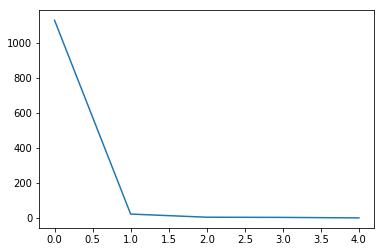

Real Percentage of gain: 2.6215601236262653
Percentage of gain: 0.038222078067789635
Total gain: 44.29938848056818
000000000000000000000000000000000000000000000000
Percentile:  0
[[396 109]
 [458 165]]
0.4973404255319149
Percentile:  1
[[14  2]
 [ 5  1]]
0.6818181818181818
Percentile:  2
[[1 1]
 [2 0]]
0.25
Percentile:  3
[[3]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.357677710534418
0.0
Diff in tren train and test
0.4731420161883738
0.5846833578792342
F1,score 0.4143556280587276
G-score: 0.467908255222722
Accuracy 0.47128129602356406
Window: 4
[[193  89]
 [270 127]]
Vol pos 0.27806180641544775
Vol neg 0.2779002039695595


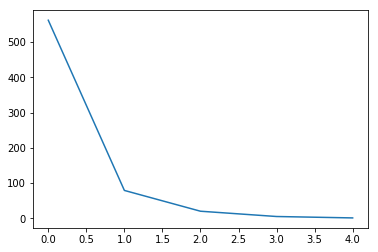

Real Percentage of gain: 0.8208349537546444
Percentage of gain: -0.015885707175447097
Total gain: -10.786395172128579
000000000000000000000000000000000000000000000000
Percentile:  0
[[171  77]
 [213 101]]
0.48398576512455516
Percentile:  1
[[14 12]
 [36 17]]
0.3924050632911392
Percentile:  2
[[ 4  0]
 [13  3]]
0.35
Percentile:  3
[[3 0]
 [0 2]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.2472118959107856
0.0
Diff in tren train and test
0.5204829667960328
0.5220017256255393
F1,score 0.5433715220949263
G-score: 0.516193595839386
Accuracy 0.5185504745470233
Window: 4
[[269 285]
 [273 332]]
Vol pos 0.38356171004149814
Vol neg 0.39430515955291173


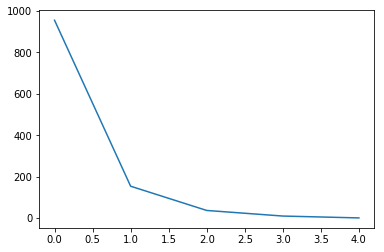

Real Percentage of gain: 4.66415385607686
Percentage of gain: 0.009058074809677005
Total gain: 10.49830870441565
000000000000000000000000000000000000000000000000
Percentile:  0
[[231 232]
 [220 272]]
0.5267015706806283
Percentile:  1
[[30 45]
 [37 42]]
0.4675324675324675
Percentile:  2
[[ 3  6]
 [13 15]]
0.4864864864864865
Percentile:  3
[[5 0]
 [2 3]]
0.8
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... MSFT
2.9815573770491772
0.0
Diff in tren train and test
0.5272688079327441
0.5358067299396031
F1,score 0.48709122203098104
G-score: 0.48700710307252354
Accuracy 0.4857635893011217
Window: 4
[[280 258]
 [338 283]]
Vol pos 0.35926445970628057
Vol neg 0.3697864236138531


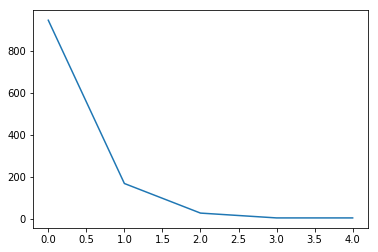

Real Percentage of gain: -0.508463036344152
Percentage of gain: -0.01564004974911174
Total gain: -18.126817659220507
000000000000000000000000000000000000000000000000
Percentile:  0
[[231 210]
 [277 229]]
0.4857444561774023
Percentile:  1
[[40 37]
 [52 40]]
0.47337278106508873
Percentile:  2
[[ 8  4]
 [ 6 10]]
0.6428571428571429
Percentile:  3
[[0 4]
 [0 1]]
0.2
Percentile:  4
[[0 3]
 [1 1]]
0.2
000000000000000000000000000000000000000000000000
Working on... FB
8.273442632816934
0.0
Diff in tren train and test
0.5162750592800173
0.5358067299396031
F1,score 0.5667485667485668
G-score: 0.5423258198956058
Accuracy 0.543572044866264
Window: 4
[[284 254]
 [275 346]]
Vol pos 0.404052783168795
Vol neg 0.4408885424722146


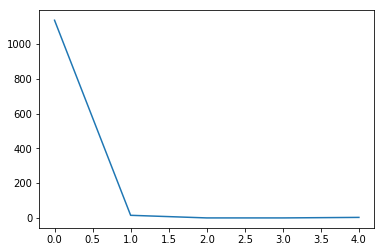

Real Percentage of gain: 6.405469465768103
Percentage of gain: 0.01839794169848087
Total gain: 21.32321442853933
000000000000000000000000000000000000000000000000
Percentile:  0
[[282 249]
 [267 338]]
0.545774647887324
Percentile:  1
[[2 5]
 [4 4]]
0.4
Percentile:  2
Percentile:  3
Percentile:  4
[[0 0]
 [1 2]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... INTC
4.729266745218887
0.0
Diff in tren train and test
0.5315800819142057
0.5220017256255393
F1,score 0.5208888888888888
G-score: 0.534656827175267
Accuracy 0.5349439171699741
Window: 4
[[327 227]
 [312 293]]
Vol pos 0.5221620512054956
Vol neg 0.48452295064021306


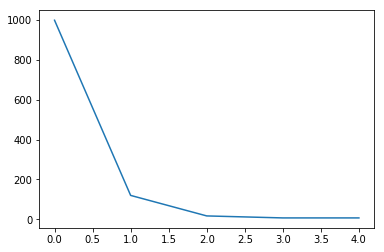

Real Percentage of gain: 5.5512305630515595
Percentage of gain: 0.05399706760339298
Total gain: 62.58260135233245
000000000000000000000000000000000000000000000000
Percentile:  0
[[271 202]
 [273 253]]
0.5245245245245245
Percentile:  1
[[45 18]
 [29 28]]
0.6083333333333333
Percentile:  2
[[5 3]
 [5 4]]
0.5294117647058824
Percentile:  3
[[3 3]
 [1 0]]
0.42857142857142855
Percentile:  4
[[2 1]
 [0 4]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... CSCO
4.705102717031152
0.0
Diff in tren train and test
0.5418283742992669
0.5314926660914582
F1,score 0.5110928512736237
G-score: 0.4850094317723956
Accuracy 0.48662640207075064
Window: 4
[[253 290]
 [305 311]]
Vol pos 0.4090154011791707
Vol neg 0.3596595753955496


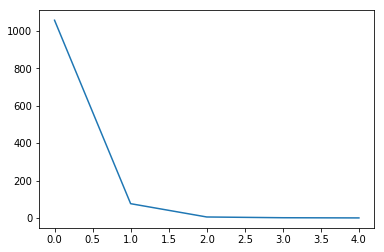

Real Percentage of gain: 0.43775933609956097
Percentage of gain: 0.014397962816825066
Total gain: 16.68723890470025
000000000000000000000000000000000000000000000000
Percentile:  0
[[224 274]
 [280 278]]
0.4753787878787879
Percentile:  1
[[27 11]
 [18 21]]
0.6233766233766234
Percentile:  2
[[1 2]
 [1 2]]
0.5
Percentile:  3
[[1 1]
 [0 0]]
0.5
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.475308641975317
0.0
Diff in tren train and test
0.49784389823199654
0.5090595340811044
F1,score 0.5111940298507462
G-score: 0.5428086294318066
Accuracy 0.547886108714409
Window: 4
[[361 208]
 [316 274]]
Vol pos 0.4974370495288592
Vol neg 0.5041293443015209


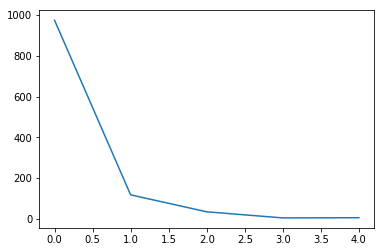

Real Percentage of gain: 10.526247662879308
Percentage of gain: 0.04461496983332928
Total gain: 51.70875003682863
000000000000000000000000000000000000000000000000
Percentile:  0
[[304 181]
 [261 228]]
0.5462012320328542
Percentile:  1
[[44 16]
 [28 30]]
0.6271186440677966
Percentile:  2
[[12  9]
 [ 9  5]]
0.4857142857142857
Percentile:  3
[[0 2]
 [2 1]]
0.2
Percentile:  4
[[1 0]
 [4 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... NVDA
3.9791051555757524
0.0
Diff in tren train and test
0.5205863332614787
0.545297670405522
F1,score 0.4250734573947111
G-score: 0.48092814831546765
Accuracy 0.49352890422778256
Window: 4
[[355 172]
 [415 217]]
Vol pos 0.5453679067725572
Vol neg 0.49493679116756917


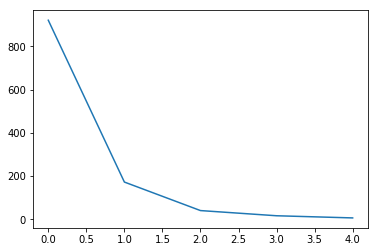

Real Percentage of gain: 2.599443172678254
Percentage of gain: 0.018483646469835743
Total gain: 21.422546258539626
000000000000000000000000000000000000000000000000
Percentile:  0
[[288 137]
 [326 170]]
0.49728555917481
Percentile:  1
[[44 27]
 [66 35]]
0.45930232558139533
Percentile:  2
[[12  6]
 [18  4]]
0.4
Percentile:  3
[[9 2]
 [1 4]]
0.8125
Percentile:  4
[[1 0]
 [1 4]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... NFLX
4.082771472132831
0.00016525711528829872
Diff in tren train and test
0.5163863734368263
0.5418464193270061
F1,score 0.4904632152588556
G-score: 0.5153374706206751
Accuracy 0.5159620362381363
Window: 4
[[328 203]
 [358 270]]
Vol pos 0.5427502598039141
Vol neg 0.5419842156958473


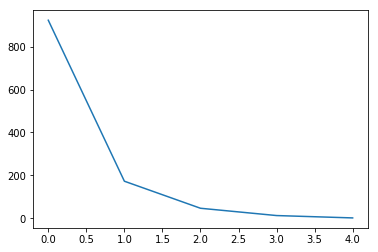

Real Percentage of gain: 0.38322456128752597
Percentage of gain: 0.017697593060716343
Total gain: 20.51151035737024
000000000000000000000000000000000000000000000000
Percentile:  0
[[264 177]
 [264 217]]
0.5216919739696312
Percentile:  1
[[42 21]
 [69 41]]
0.4797687861271676
Percentile:  2
[[13  4]
 [22  8]]
0.44680851063829785
Percentile:  3
[[7 1]
 [3 2]]
0.6923076923076923
Percentile:  4
[[1 0]
 [0 1]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
1.172681553570028
0.000939946799010321
Diff in tren train and test
0.5128939828080229
0.5252293577981652
F1,score 0.5579399141630901
G-score: 0.5236833453001525
Accuracy 0.5275229357798165
Window: 4
[[100 107]
 [ 99 130]]
Vol pos 0.2485165528724426
Vol neg 0.2708866905838369


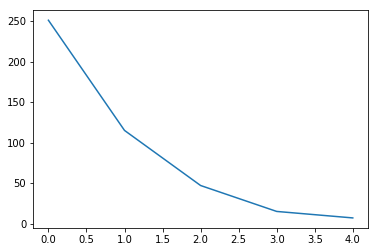

Real Percentage of gain: 0.48630919013281376
Percentage of gain: 0.0031104332577784155
Total gain: 1.3561489003913891
000000000000000000000000000000000000000000000000
Percentile:  0
[[57 63]
 [50 81]]
0.549800796812749
Percentile:  1
[[22 27]
 [30 35]]
0.5
Percentile:  2
[[14 12]
 [11 10]]
0.5106382978723404
Percentile:  3
[[4 2]
 [5 4]]
0.5333333333333333
Percentile:  4
[[2 2]
 [3 0]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... ADBE
3.3983248022335957
0.0
Diff in tren train and test
0.5432205216641518
0.5470232959447799
F1,score 0.5206611570247933
G-score: 0.4998422464071794
Accuracy 0.4995685936151855
Window: 4
[[264 261]
 [319 315]]
Vol pos 0.4314610782540692
Vol neg 0.4245130294242334


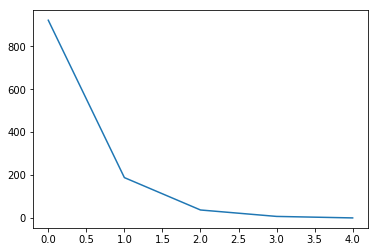

Real Percentage of gain: -3.0501098704170246
Percentage of gain: 0.0031047517196295957
Total gain: 3.598407243050701
000000000000000000000000000000000000000000000000
Percentile:  0
[[201 219]
 [252 250]]
0.4891540130151844
Percentile:  1
[[50 35]
 [47 56]]
0.5638297872340425
Percentile:  2
[[ 8  6]
 [18  5]]
0.35135135135135137
Percentile:  3
[[4 1]
 [1 1]]
0.7142857142857143
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... AMGN
3.3162393162393125
0.0
Diff in tren train and test
0.5051746442432082
0.5323554788610871
F1,score 0.5490848585690514
G-score: 0.5321765000975108
Accuracy 0.5323554788610871
Window: 4
[[287 255]
 [287 330]]
Vol pos 0.4356576459027808
Vol neg 0.40328488492862496


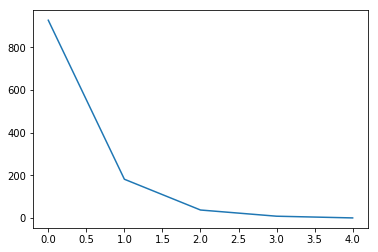

Real Percentage of gain: 6.178267036304381
Percentage of gain: 0.043330767809060415
Total gain: 50.22035989070102
000000000000000000000000000000000000000000000000
Percentile:  0
[[226 216]
 [230 254]]
0.5183585313174947
Percentile:  1
[[49 26]
 [51 56]]
0.5769230769230769
Percentile:  2
[[ 8 12]
 [ 4 14]]
0.5789473684210527
Percentile:  3
[[3 0]
 [2 4]]
0.7777777777777778
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... TXN
3.62011743681389
0.0
Diff in tren train and test
0.5517464424320828
0.5409836065573771
F1,score 0.48864668483197093
G-score: 0.5135236266147417
Accuracy 0.5142364106988784
Window: 4
[[327 205]
 [358 269]]
Vol pos 0.42788168232994744
Vol neg 0.4056937634677614


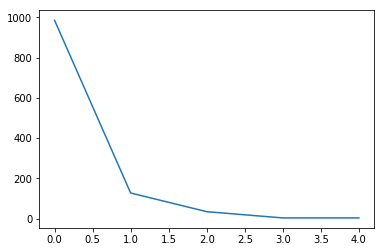

Real Percentage of gain: -0.05807618070313859
Percentage of gain: 0.022961081825969804
Total gain: 26.611893836299004
000000000000000000000000000000000000000000000000
Percentile:  0
[[281 178]
 [315 212]]
0.5
Percentile:  1
[[32 20]
 [30 45]]
0.6062992125984252
Percentile:  2
[[14  7]
 [ 6  7]]
0.6176470588235294
Percentile:  3
[[0 0]
 [3 0]]
0.0
Percentile:  4
[[0 0]
 [2 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... AVGO
3.5186302609745104
0.0
Diff in tren train and test
0.5191893057352307
0.5289042277825712
F1,score 0.5146198830409356
G-score: 0.4984604230268748
Accuracy 0.4987057808455565
Window: 4
[[270 276]
 [305 308]]
Vol pos 0.44863383656716715
Vol neg 0.4353114308970034


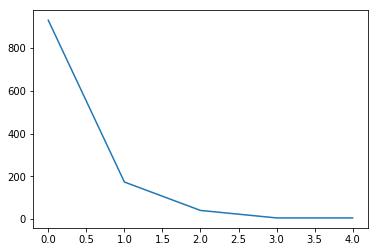

Real Percentage of gain: 2.0773898019045993
Percentage of gain: 0.005517183938450078
Total gain: 6.3944161846636405
000000000000000000000000000000000000000000000000
Percentile:  0
[[229 220]
 [247 234]]
0.4978494623655914
Percentile:  1
[[26 48]
 [44 55]]
0.4682080924855491
Percentile:  2
[[ 9  6]
 [12 13]]
0.55
Percentile:  3
[[2 0]
 [0 3]]
1.0
Percentile:  4
[[3 2]
 [0 0]]
0.6
000000000000000000000000000000000000000000000000
Working on... PYPL
4.9430161675059505
0.0
Diff in tren train and test
0.5337357189049364
0.5306298533218292
F1,score 0.524338172502135
G-score: 0.5202872555731233
Accuracy 0.5194132873166523
Window: 4
[[295 249]
 [308 307]]
Vol pos 0.5055328262018501
Vol neg 0.5024604973431334


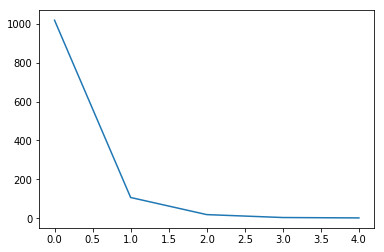

Real Percentage of gain: 3.4860883237626767
Percentage of gain: 0.021104628432604383
Total gain: 24.46026435338848
000000000000000000000000000000000000000000000000
Percentile:  0
[[261 214]
 [271 272]]
0.5235756385068763
Percentile:  1
[[24 31]
 [28 24]]
0.4485981308411215
Percentile:  2
[[6 4]
 [3 6]]
0.631578947368421
Percentile:  3
[[1 0]
 [1 2]]
0.75
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.47230206192292
0.0
Diff in tren train and test
0.5026957084321759
0.5220017256255393
F1,score 0.6498461538461539
G-score: 0.31252174194139626
Accuracy 0.5090595340811044
Window: 4
[[ 62 492]
 [ 77 528]]
Vol pos 0.4301301987325528
Vol neg 0.38783063751429314


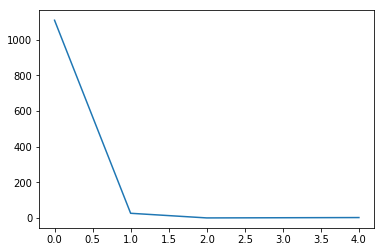

Real Percentage of gain: 4.598093354212991
Percentage of gain: 0.028560124682116793
Total gain: 33.10118450657336
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 58 482]
 [ 74 495]]
0.49864743011722273
Percentile:  1
[[ 1  9]
 [ 0 16]]
0.6538461538461539
Percentile:  2
Percentile:  3
[[1]]
1.0
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... COST
2.3891650603631978
0.0
Diff in tren train and test
0.5281310627290364
0.543572044866264
F1,score 0.4660714285714285
G-score: 0.4847108823633956
Accuracy 0.4840379637618637
Window: 4
[[300 229]
 [369 261]]
Vol pos 0.29865914552871436
Vol neg 0.3082755281465226


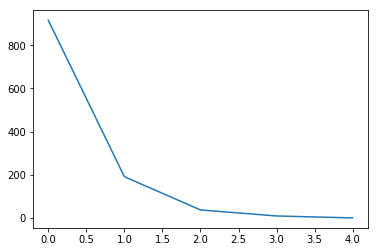

Real Percentage of gain: -2.6414698363033584
Percentage of gain: -0.014496104564289684
Total gain: -16.800985190011744
000000000000000000000000000000000000000000000000
Percentile:  0
[[245 185]
 [281 205]]
0.4912663755458515
Percentile:  1
[[46 36]
 [66 43]]
0.46596858638743455
Percentile:  2
[[ 6  6]
 [14 11]]
0.4594594594594595
Percentile:  3
[[3 2]
 [4 0]]
0.3333333333333333
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... QCOM
4.165966739459091
0.0
Diff in tren train and test
0.510023712006898
0.5263157894736842
F1,score 0.5375972342264477
G-score: 0.5391396514791578
Accuracy 0.5383951682484901
Window: 4
[[313 236]
 [299 311]]
Vol pos 0.47693246569146025
Vol neg 0.42104279202924744


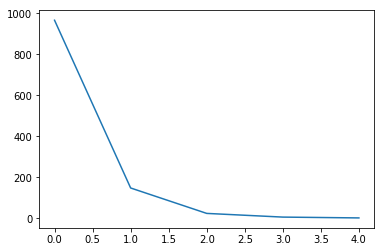

Real Percentage of gain: 6.619885679903739
Percentage of gain: 0.062422747934274214
Total gain: 72.34796485582382
000000000000000000000000000000000000000000000000
Percentile:  0
[[265 203]
 [251 247]]
0.5300207039337475
Percentile:  1
[[43 30]
 [34 41]]
0.5675675675675675
Percentile:  2
[[ 5  3]
 [ 4 12]]
0.7083333333333334
Percentile:  3
[[0 0]
 [4 2]]
0.3333333333333333
Percentile:  4
[[0 0]
 [1 1]]
0.5
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.5111136369568645
Mean gain over portfolio :  20.93643571319806
Real mean gain over portfolio 2.6951838861850206


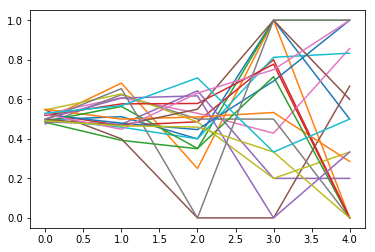

In [3]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[4]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

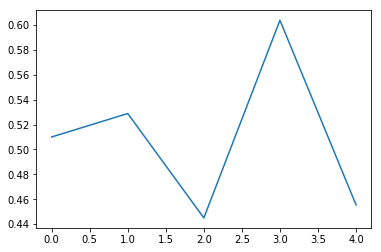

In [4]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
6.2151820652697705
0.0025906064609701575
Diff in tren train and test
0.5251082251082251
0.5597920277296361
F1,score 0.5231010180109632
G-score: 0.46341100797980844
Accuracy 0.47227036395147315
Window: 28
[[211 297]
 [312 334]]
Vol pos 0.8668109484075827
Vol neg 1.0605718600311689


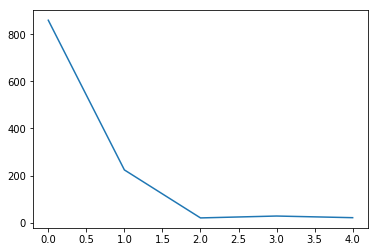

Real Percentage of gain: 12.374473367080055
Percentage of gain: -0.1503260796159872
Total gain: -173.47629587684924
000000000000000000000000000000000000000000000000
Percentile:  0
[[168 240]
 [197 254]]
0.4912689173457509
Percentile:  1
[[43 55]
 [73 53]]
0.42857142857142855
Percentile:  2
[[ 0  1]
 [10  9]]
0.45
Percentile:  3
[[ 0  0]
 [15 13]]
0.4642857142857143
Percentile:  4
[[ 0  0]
 [16  5]]
0.23809523809523808
000000000000000000000000000000000000000000000000
Working on... AMZN
12.157084770188899
0.000917344130579077
Diff in tren train and test
0.5680883308075341
0.6377816291161178
F1,score 0.4733218588640276
G-score: 0.48853415218280316
Accuracy 0.4696707105719237
Window: 28
[[267 151]
 [461 275]]
Vol pos 1.0141262589272928
Vol neg 1.0477768940046635


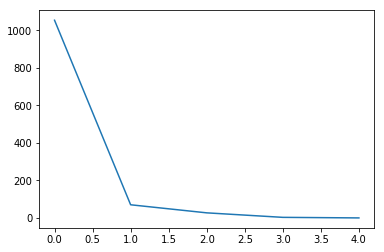

Real Percentage of gain: -21.38947790406339
Percentage of gain: -0.07936137503662158
Total gain: -91.58302679226131
000000000000000000000000000000000000000000000000
Percentile:  0
[[263 121]
 [422 246]]
0.4838403041825095
Percentile:  1
[[ 3 23]
 [28 16]]
0.2714285714285714
Percentile:  2
[[ 1  6]
 [10 10]]
0.4074074074074074
Percentile:  3
[[0 0]
 [1 2]]
0.6666666666666666
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.3687214611872096
0.0
Diff in tren train and test
0.44942571322712116
0.7507418397626113
F1,score 0.34756995581737854
G-score: 0.39605028132054926
Accuracy 0.3427299703264095
Window: 28
[[113  55]
 [388 118]]
Vol pos 0.7850727083439877
Vol neg 0.6795199406382229


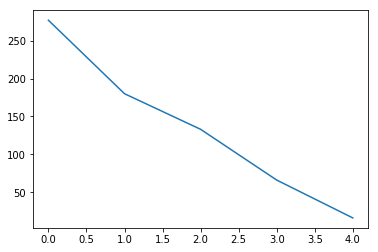

Real Percentage of gain: -23.2288429346815
Percentage of gain: -0.1775601455122724
Total gain: -119.67553807527159
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 67  29]
 [149  32]]
0.3574007220216607
Percentile:  1
[[ 11  21]
 [120  28]]
0.21666666666666667
Percentile:  2
[[14  4]
 [78 37]]
0.38345864661654133
Percentile:  3
[[13  1]
 [32 20]]
0.5
Percentile:  4
[[8 0]
 [8 0]]
0.5
000000000000000000000000000000000000000000000000
Working on... GOOGL
5.878547598584186
0.00042690345577337966
Diff in tren train and test
0.5540160207837194
0.561525129982669
F1,score 0.5695792880258899
G-score: 0.5383819020581655
Accuracy 0.5389948006932409
Window: 28
[[270 236]
 [296 352]]
Vol pos 1.2775178331777473
Vol neg 1.1422133550866342


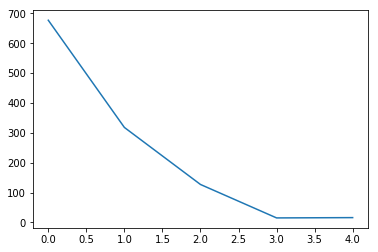

Real Percentage of gain: 21.822368705113636
Percentage of gain: 0.16200917446314497
Total gain: 186.9585873304693
000000000000000000000000000000000000000000000000
Percentile:  0
[[163 162]
 [178 173]]
0.4970414201183432
Percentile:  1
[[ 88  44]
 [ 81 106]]
0.6081504702194357
Percentile:  2
[[ 6 17]
 [36 67]]
0.5793650793650794
Percentile:  3
[[6 2]
 [1 6]]
0.8
Percentile:  4
[[ 6 10]
 [ 0  0]]
0.375
000000000000000000000000000000000000000000000000
Working on... MSFT
6.174452793204837
0.0
Diff in tren train and test
0.554978354978355
0.5866551126516465
F1,score 0.37076271186440674
G-score: 0.4567682045585134
Accuracy 0.4852686308492201
Window: 28
[[385  92]
 [502 175]]
Vol pos 0.8828740924844303
Vol neg 0.8111910460924262


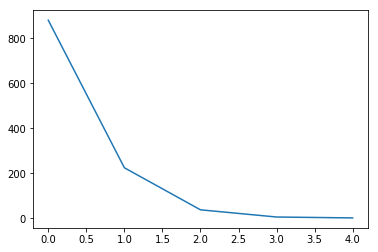

Real Percentage of gain: -2.1984013508176674
Percentage of gain: 0.010885624274159253
Total gain: 12.562010412379777
000000000000000000000000000000000000000000000000
Percentile:  0
[[308  58]
 [406 109]]
0.4733257661748014
Percentile:  1
[[67 26]
 [85 47]]
0.5066666666666667
Percentile:  2
[[ 4  7]
 [10 17]]
0.5526315789473685
Percentile:  3
[[4 1]
 [0 1]]
0.8333333333333334
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... FB
10.887151375939736
0.0
Diff in tren train and test
0.5322510822510822
0.58578856152513
F1,score 0.5349019607843136
G-score: 0.48183820649723735
Accuracy 0.4861351819757366
Window: 28
[[220 258]
 [335 341]]
Vol pos 1.3128178037487348
Vol neg 1.2758250739440087


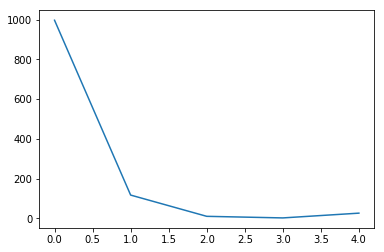

Real Percentage of gain: -18.92575109282872
Percentage of gain: -0.017394697526652476
Total gain: -20.073480945756955
000000000000000000000000000000000000000000000000
Percentile:  0
[[209 234]
 [281 273]]
0.4834503510531595
Percentile:  1
[[ 9 16]
 [41 51]]
0.5128205128205128
Percentile:  2
[[2 8]
 [0 0]]
0.2
Percentile:  3
[[2]]
1.0
Percentile:  4
[[ 0  0]
 [13 13]]
0.5
000000000000000000000000000000000000000000000000
Working on... INTC
8.395303326810174
0.0
Diff in tren train and test
0.5556277056277056
0.5424610051993067
F1,score 0.4468802698145026
G-score: 0.4322119493205202
Accuracy 0.43154246100519933
Window: 28
[[233 295]
 [361 265]]
Vol pos 1.2243958824446657
Vol neg 1.2183185465770943


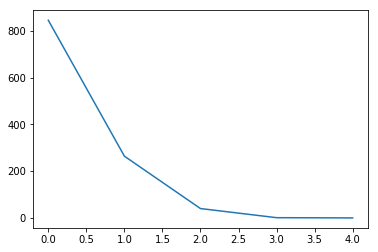

Real Percentage of gain: -34.055371061367936
Percentage of gain: -0.16418355034413376
Total gain: -189.46781709713036
000000000000000000000000000000000000000000000000
Percentile:  0
[[169 208]
 [290 178]]
0.4106508875739645
Percentile:  1
[[56 60]
 [66 82]]
0.5227272727272727
Percentile:  2
[[ 7 27]
 [ 3  3]]
0.25
Percentile:  3
[[1]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... CSCO
5.061619718309853
0.0
Diff in tren train and test
0.5869235765317168
0.5233968804159446
F1,score 0.5466893039049237
G-score: 0.5374477558861362
Accuracy 0.537261698440208
Window: 28
[[298 252]
 [282 322]]
Vol pos 0.9591673533760307
Vol neg 0.8948520468288882


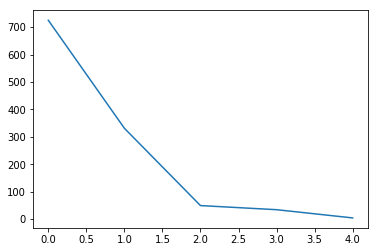

Real Percentage of gain: 34.65899660505471
Percentage of gain: 0.10124156506630214
Total gain: 116.83276608651265
000000000000000000000000000000000000000000000000
Percentile:  0
[[166 161]
 [176 222]]
0.5351724137931034
Percentile:  1
[[99 76]
 [85 71]]
0.513595166163142
Percentile:  2
[[14  5]
 [15 15]]
0.5918367346938775
Percentile:  3
[[16  8]
 [ 2  8]]
0.7058823529411765
Percentile:  4
[[3 1]
 [0 0]]
0.75
000000000000000000000000000000000000000000000000
Working on... CMCSA
8.98261429491308
0.0
Diff in tren train and test
0.4684996752543841
0.5051993067590987
F1,score 0.4898710865561694
G-score: 0.51660870540138
Accuracy 0.5199306759098787
Window: 28
[[334 237]
 [317 266]]
Vol pos 1.361565739146647
Vol neg 1.5542008436600003


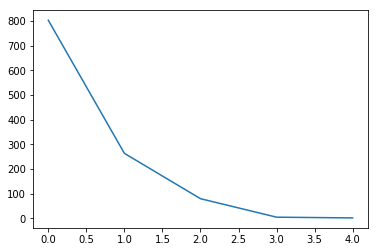

Real Percentage of gain: 17.438899276091878
Percentage of gain: -0.03820435346590304
Total gain: -44.08782389965211
000000000000000000000000000000000000000000000000
Percentile:  0
[[248 142]
 [230 183]]
0.5367372353673724
Percentile:  1
[[63 78]
 [63 59]]
0.46387832699619774
Percentile:  2
[[23 15]
 [20 21]]
0.5569620253164557
Percentile:  3
[[0 2]
 [0 2]]
0.5
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
7.248431726389965
0.007644967700004514
Diff in tren train and test
0.5742424242424242
0.5805892547660312
F1,score 0.43863179074446673
G-score: 0.5040969439267409
Accuracy 0.5164644714038128
Window: 28
[[378 106]
 [452 218]]
Vol pos 1.555853490405496
Vol neg 1.3122913853418936


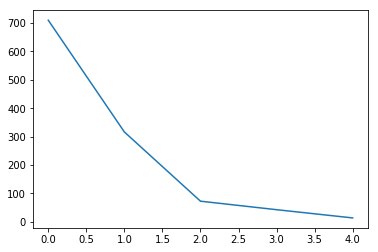

Real Percentage of gain: -1.911068489760522
Percentage of gain: 0.16900354182053628
Total gain: 195.03008726089888
000000000000000000000000000000000000000000000000
Percentile:  0
[[258  58]
 [280 115]]
0.5246132208157525
Percentile:  1
[[ 86  36]
 [143  49]]
0.4299363057324841
Percentile:  2
[[14  8]
 [25 26]]
0.547945205479452
Percentile:  3
[[19  2]
 [ 3 17]]
0.8780487804878049
Percentile:  4
[[ 1  2]
 [ 0 10]]
0.8461538461538461
000000000000000000000000000000000000000000000000
Working on... NFLX
7.410943467100719
0.001406110187899634
Diff in tren train and test
0.5667893483437974
0.610051993067591
F1,score 0.10290237467018469
G-score: 0.23141118461223167
Accuracy 0.41074523396880414
Window: 28
[[435  15]
 [665  39]]
Vol pos 1.4113487127054951
Vol neg 1.7103454932031639


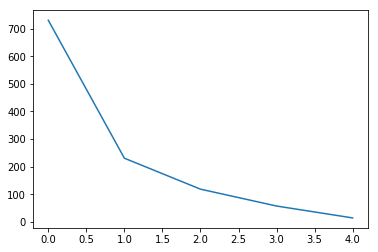

Real Percentage of gain: -83.24561887484491
Percentage of gain: -0.4281244762181514
Total gain: -494.05564555574676
000000000000000000000000000000000000000000000000
Percentile:  0
[[337  14]
 [366  12]]
0.4787379972565158
Percentile:  1
[[ 61   1]
 [160   9]]
0.30303030303030304
Percentile:  2
[[15  0]
 [93 11]]
0.2184873949579832
Percentile:  3
[[11  0]
 [42  5]]
0.27586206896551724
Percentile:  4
[[10  0]
 [ 3  2]]
0.8
000000000000000000000000000000000000000000000000
Working on... BKNG
1.6778197592411772
0.0027997872161690247
Diff in tren train and test
0.5544611819235226
0.6125290023201856
F1,score 0.5576519916142557
G-score: 0.5123010521083186
Accuracy 0.5104408352668214
Window: 28
[[ 87  80]
 [131 133]]
Vol pos 0.4755737288037251
Vol neg 0.5298469441795739


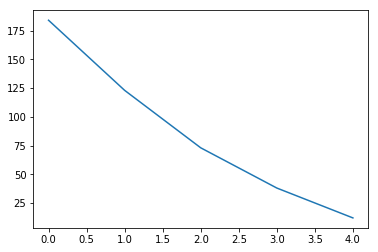

Real Percentage of gain: -18.613868176191275
Percentage of gain: -0.016639176067449118
Total gain: -7.171484885070569
000000000000000000000000000000000000000000000000
Percentile:  0
[[38 34]
 [52 60]]
0.532608695652174
Percentile:  1
[[27 20]
 [35 40]]
0.5491803278688525
Percentile:  2
[[12 15]
 [26 20]]
0.4383561643835616
Percentile:  3
[[ 5  6]
 [15 12]]
0.4473684210526316
Percentile:  4
[[5 5]
 [2 1]]
0.46153846153846156
000000000000000000000000000000000000000000000000
Working on... ADBE
5.959915611814346
0.0
Diff in tren train and test
0.5733766233766234
0.6559792027729636
F1,score 0.41263940520446096
G-score: 0.4707538943645875
Accuracy 0.45233968804159447
Window: 28
[[300  97]
 [535 222]]
Vol pos 1.201885100110424
Vol neg 1.0553187582952137


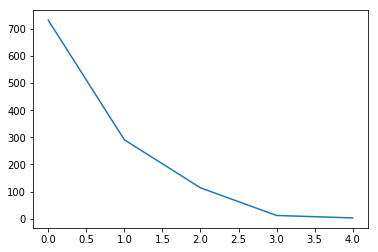

Real Percentage of gain: -10.128877938695554
Percentage of gain: -0.03429586913772417
Total gain: -39.577432984933694
000000000000000000000000000000000000000000000000
Percentile:  0
[[161  66]
 [360 145]]
0.4180327868852459
Percentile:  1
[[ 97  16]
 [135  43]]
0.48109965635738833
Percentile:  2
[[36  9]
 [40 29]]
0.5701754385964912
Percentile:  3
[[4 4]
 [0 4]]
0.6666666666666666
Percentile:  4
[[1 2]
 [0 0]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... AMGN
5.291005291005295
0.0
Diff in tren train and test
0.5050876813163022
0.6074523396880416
F1,score 0.5539906103286385
G-score: 0.5063577239083998
Accuracy 0.5060658578856152
Window: 28
[[230 223]
 [347 354]]
Vol pos 1.09369868006216
Vol neg 0.9817216740517231


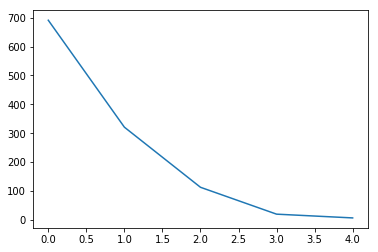

Real Percentage of gain: 5.965912750978203
Percentage of gain: 0.06857770792618653
Total gain: 79.13867494681926
000000000000000000000000000000000000000000000000
Percentile:  0
[[135 142]
 [217 197]]
0.4804630969609262
Percentile:  1
[[ 55  51]
 [108 107]]
0.5046728971962616
Percentile:  2
[[29 14]
 [22 48]]
0.6814159292035398
Percentile:  3
[[ 9 10]
 [ 0  1]]
0.5
Percentile:  4
[[2 5]
 [0 0]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... TXN
5.987780040733193
0.0
Diff in tren train and test
0.6269755358302663
0.5883882149046794
F1,score 0.46153846153846156
G-score: 0.39825991562127794
Accuracy 0.4055459272097054
Window: 28
[[174 301]
 [385 294]]
Vol pos 0.9983663411440004
Vol neg 0.9190127946831489


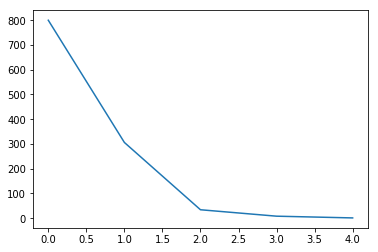

Real Percentage of gain: -29.550001221627735
Percentage of gain: -0.14142749523158402
Total gain: -163.20732949724794
000000000000000000000000000000000000000000000000
Percentile:  0
[[136 240]
 [236 188]]
0.405
Percentile:  1
[[ 38  60]
 [128  80]]
0.38562091503267976
Percentile:  2
[[ 0  1]
 [17 16]]
0.47058823529411764
Percentile:  3
[[0 0]
 [2 6]]
0.75
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
5.610368642927625
0.0
Diff in tren train and test
0.48148949989175144
0.6117850953206239
F1,score 0.5966149506346967
G-score: 0.46113425890398246
Accuracy 0.5043327556325823
Window: 28
[[159 289]
 [283 423]]
Vol pos 1.3778214970086424
Vol neg 1.0486471626888576


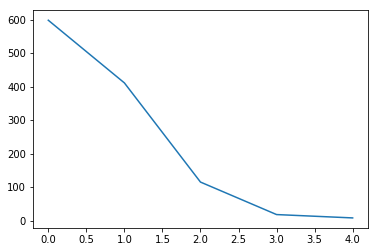

Real Percentage of gain: -31.0377466146984
Percentage of gain: 0.1751004629124812
Total gain: 202.0659342010033
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 63 145]
 [175 215]]
0.46488294314381273
Percentile:  1
[[ 61 126]
 [ 93 131]]
0.46715328467153283
Percentile:  2
[[26 15]
 [15 59]]
0.7391304347826086
Percentile:  3
[[7 3]
 [0 8]]
0.8333333333333334
Percentile:  4
[[2 0]
 [0 6]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
6.66413758219524
0.0
Diff in tren train and test
0.5857142857142857
0.6317157712305026
F1,score 0.6546762589928057
G-score: 0.5671129004691039
Accuracy 0.584055459272097
Window: 28
[[219 206]
 [274 455]]
Vol pos 1.3100831453958848
Vol neg 1.3989910576727398


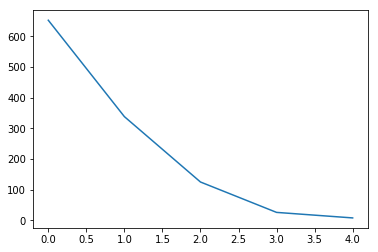

Real Percentage of gain: 48.68649165983039
Percentage of gain: 0.18325852020269598
Total gain: 211.48033231391116
000000000000000000000000000000000000000000000000
Percentile:  0
[[136 101]
 [167 248]]
0.588957055214724
Percentile:  1
[[ 53  51]
 [ 82 152]]
0.606508875739645
Percentile:  2
[[21 36]
 [21 47]]
0.544
Percentile:  3
[[ 7 11]
 [ 2  6]]
0.5
Percentile:  4
[[1 7]
 [0 0]]
0.125
000000000000000000000000000000000000000000000000
Working on... GILD
7.934752557367997
0.0
Diff in tren train and test
0.4744478129060199
0.5433275563258232
F1,score 0.6962699822380106
G-score: 0.3071054472878715
Accuracy 0.5554592720970537
Window: 28
[[ 53 474]
 [ 39 588]]
Vol pos 0.986598707673968
Vol neg 1.1177801707121005


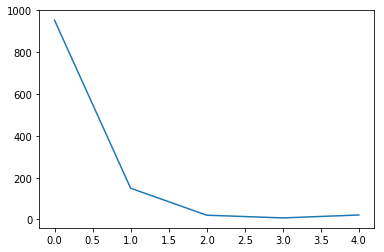

Real Percentage of gain: 82.50784362207756
Percentage of gain: 0.05111658929263945
Total gain: 58.98854404370593
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 35 399]
 [ 38 480]]
0.5409663865546218
Percentile:  1
[[ 13  35]
 [  0 101]]
0.7651006711409396
Percentile:  2
[[ 4 12]
 [ 0  4]]
0.4
Percentile:  3
[[0 7]
 [0 0]]
0.0
Percentile:  4
[[ 1 20]
 [ 0  0]]
0.047619047619047616
000000000000000000000000000000000000000000000000
Working on... COST
2.7652341569841132
0.0027343749999936273
Diff in tren train and test
0.5541125541125541
0.5953206239168111
F1,score 0.31921824104234525
G-score: 0.41726663243561546
Accuracy 0.45667244367417675
Window: 28
[[380  87]
 [540 147]]
Vol pos 0.6468122884067339
Vol neg 0.7754300767620632


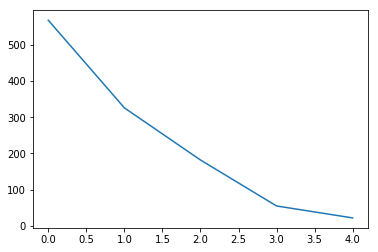

Real Percentage of gain: -22.789242060009393
Percentage of gain: -0.12593118036348777
Total gain: -145.3245821394649
000000000000000000000000000000000000000000000000
Percentile:  0
[[199  56]
 [233  82]]
0.49298245614035086
Percentile:  1
[[100  23]
 [154  48]]
0.4553846153846154
Percentile:  2
[[66  8]
 [95 12]]
0.430939226519337
Percentile:  3
[[13  0]
 [37  4]]
0.3148148148148148
Percentile:  4
[[ 2  0]
 [19  1]]
0.13636363636363635
000000000000000000000000000000000000000000000000
Working on... QCOM
6.459999999999993
0.0
Diff in tren train and test
0.5054112554112554
0.5771230502599654
F1,score 0.4654300168634064
G-score: 0.4552001836634155
Accuracy 0.4506065857885615
Window: 28
[[244 244]
 [390 276]]
Vol pos 1.3156444948701034
Vol neg 1.1914724968184733


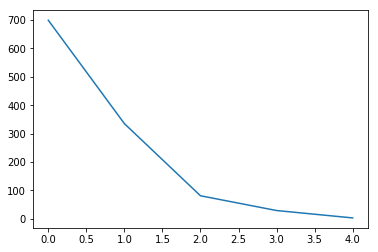

Real Percentage of gain: -13.499774368231012
Percentage of gain: -0.06174906902119438
Total gain: -71.25842565045832
000000000000000000000000000000000000000000000000
Percentile:  0
[[177 133]
 [241 148]]
0.46494992846924177
Percentile:  1
[[ 58  97]
 [114  66]]
0.3701492537313433
Percentile:  2
[[ 9 14]
 [27 31]]
0.49382716049382713
Percentile:  3
[[ 0  0]
 [ 1 28]]
0.9655172413793104
Percentile:  4
[[0 0]
 [1 2]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.4818266511982057
Mean gain over portfolio :  -24.79509734020717
Real mean gain over portfolio -4.355952805079579


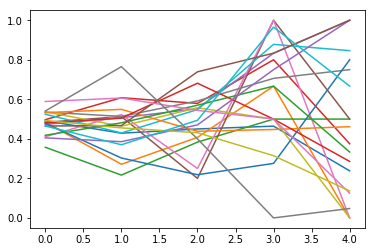

In [5]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

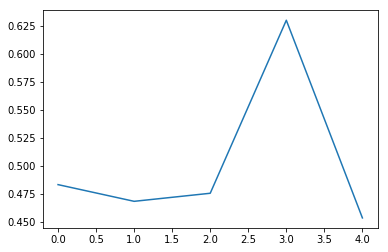

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5483443708609271
0.5512367491166078
F1,score 0.38143036386449186
G-score: 0.4832391631842865
Accuracy 0.5644876325088339
Window: 140
[[487  21]
 [472 152]]
Vol pos 3.4984069326624594
Vol neg 2.7151446434075885


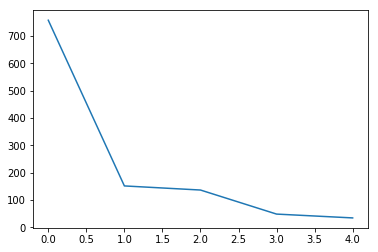

Real Percentage of gain: 23.360976695284545
Percentage of gain: 0.7923283752397265
Total gain: 896.9157207713704
000000000000000000000000000000000000000000000000
Percentile:  0
[[378   6]
 [365  10]]
0.5111989459815547
Percentile:  1
[[57  9]
 [57 27]]
0.56
Percentile:  2
[[52  6]
 [ 9 70]]
0.8905109489051095
Percentile:  3
[[ 0  0]
 [11 38]]
0.7755102040816326
Percentile:  4
[[ 0  0]
 [28  7]]
0.2
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.681828218149702
0.7782685512367491
F1,score 0.27480916030534347
G-score: 0.3853220432895432
Accuracy 0.3286219081272085
Window: 140
[[228  23]
 [737 144]]
Vol pos 2.332248589400775
Vol neg 2.371283354612008


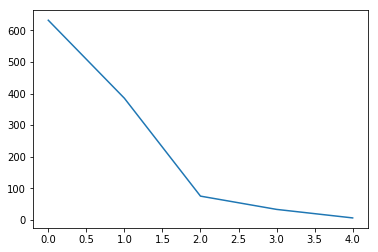

Real Percentage of gain: -142.48840519748933
Percentage of gain: -0.8255997122332488
Total gain: -934.5788742480376
000000000000000000000000000000000000000000000000
Percentile:  0
[[186  13]
 [378  54]]
0.3803486529318542
Percentile:  1
[[ 28   8]
 [292  57]]
0.22077922077922077
Percentile:  2
[[14  2]
 [54  5]]
0.25333333333333335
Percentile:  3
[[ 0  0]
 [12 21]]
0.6363636363636364
Percentile:  4
[[0 0]
 [1 5]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.32886163280950553
0.8634969325153374
F1,score 0.3730715287517532
G-score: 0.4371624668381747
Accuracy 0.31441717791411045
Window: 140
[[ 72  17]
 [430 133]]
Vol pos 1.4949211863839567
Vol neg 2.3642510560900454


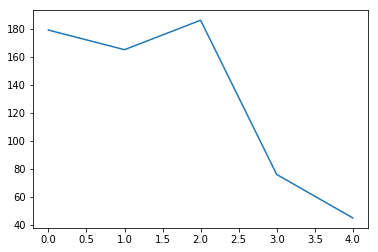

Real Percentage of gain: -86.83016858017281
Percentage of gain: -1.1508610105269006
Total gain: -750.3613788635391
000000000000000000000000000000000000000000000000
Percentile:  0
[[61  9]
 [80 29]]
0.5027932960893855
Percentile:  1
[[ 11   8]
 [100  46]]
0.34545454545454546
Percentile:  2
[[  0   0]
 [143  43]]
0.23118279569892472
Percentile:  3
[[ 0  0]
 [62 14]]
0.18421052631578946
Percentile:  4
[[ 0  0]
 [44  1]]
0.022222222222222223
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6281739898432325
0.598939929328622
F1,score 0.6536458333333333
G-score: 0.3997809752124941
Accuracy 0.5300353356890459
Window: 140
[[ 98 356]
 [176 502]]
Vol pos 3.2409899826523905
Vol neg 2.613393977004205


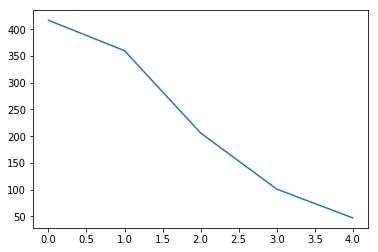

Real Percentage of gain: 11.248958548220175
Percentage of gain: 0.48963639030494466
Total gain: 554.2683938251973
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 64 167]
 [ 65 120]]
0.4423076923076923
Percentile:  1
[[ 13  98]
 [ 49 200]]
0.5916666666666667
Percentile:  2
[[19 78]
 [15 94]]
0.5485436893203883
Percentile:  3
[[ 2 12]
 [40 47]]
0.48514851485148514
Percentile:  4
[[ 0  0]
 [ 7 40]]
0.851063829787234
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6783664459161148
0.622791519434629
F1,score 0.10169491525423728
G-score: 0.22877812170321996
Accuracy 0.3913427561837456
Window: 140
[[404  23]
 [666  39]]
Vol pos 1.271435528133554
Vol neg 1.7572771169253292


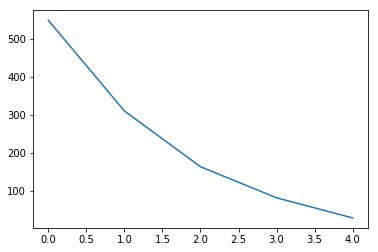

Real Percentage of gain: -54.64531503193211
Percentage of gain: -0.5720123627194235
Total gain: -647.5179945983873
000000000000000000000000000000000000000000000000
Percentile:  0
[[283  17]
 [240   9]]
0.5318761384335154
Percentile:  1
[[ 70   4]
 [227   9]]
0.25483870967741934
Percentile:  2
[[ 22   1]
 [126  14]]
0.22085889570552147
Percentile:  3
[[19  1]
 [56  5]]
0.2962962962962963
Percentile:  4
[[10  0]
 [16  2]]
0.42857142857142855
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5688741721854305
0.7676678445229682
F1,score 0.625449317038102
G-score: 0.5787795794666107
Accuracy 0.5397526501766784
Window: 140
[[176  87]
 [434 435]]
Vol pos 3.4333013886252073
Vol neg 2.6650048479722885


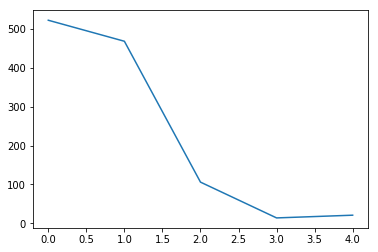

Real Percentage of gain: -15.12182839998794
Percentage of gain: 0.626572104820176
Total gain: 709.2796226564392
000000000000000000000000000000000000000000000000
Percentile:  0
[[166  46]
 [224  86]]
0.4827586206896552
Percentile:  1
[[  9  28]
 [191 240]]
0.532051282051282
Percentile:  2
[[ 0 13]
 [17 75]]
0.7142857142857143
Percentile:  3
[[ 0  0]
 [ 2 12]]
0.8571428571428571
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.5922737306843268
0.6033568904593639
F1,score 0.18912529550827423
G-score: 0.3089953997860804
Accuracy 0.39399293286219084
Window: 140
[[366  83]
 [603  80]]
Vol pos 2.5710990585941027
Vol neg 2.1803391059143746


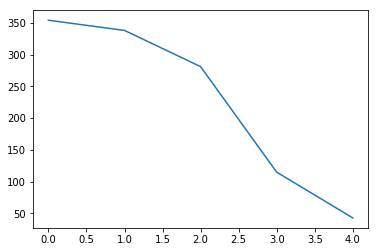

Real Percentage of gain: -132.70924703014657
Percentage of gain: -0.3083060481663351
Total gain: -349.0024465242914
000000000000000000000000000000000000000000000000
Percentile:  0
[[100  16]
 [211  27]]
0.3587570621468927
Percentile:  1
[[ 96  18]
 [207  20]]
0.34017595307917886
Percentile:  2
[[ 99  28]
 [131  20]]
0.42805755395683454
Percentile:  3
[[44 19]
 [47  4]]
0.42105263157894735
Percentile:  4
[[27  2]
 [ 6  8]]
0.813953488372093
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6774122322808567
0.5485865724381626
F1,score 0.003215434083601286
G-score: 0.0401286176952564
Accuracy 0.45229681978798586
Window: 140
[[511   0]
 [620   1]]
Vol pos 2.1601123434865044
Vol neg 1.5831605097915495


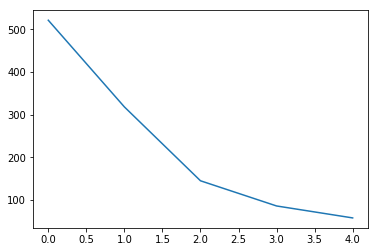

Real Percentage of gain: 52.95152772538662
Percentage of gain: 0.10990989734481413
Total gain: 124.4180037943296
000000000000000000000000000000000000000000000000
Percentile:  0
[[231   0]
 [289   1]]
0.44529750479846447
Percentile:  1
[[105   0]
 [213   0]]
0.330188679245283
Percentile:  2
[[64  0]
 [81  0]]
0.4413793103448276
Percentile:  3
[[58  0]
 [28  0]]
0.6744186046511628
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.4561713402517112
0.5220848056537103
F1,score 0.651639344262295
G-score: 0.46510479580117137
Accuracy 0.549469964664311
Window: 140
[[145 396]
 [114 477]]
Vol pos 3.003021697748887
Vol neg 2.6821633811753736


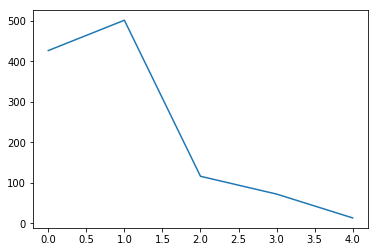

Real Percentage of gain: 152.3853971906611
Percentage of gain: 0.4416750632512078
Total gain: 499.97617160036725
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 33 194]
 [ 56 144]]
0.41451990632318503
Percentile:  1
[[ 75 123]
 [ 50 254]]
0.6553784860557769
Percentile:  2
[[21 21]
 [ 6 68]]
0.7672413793103449
Percentile:  3
[[15 45]
 [ 2 10]]
0.3472222222222222
Percentile:  4
[[ 1 12]
 [ 0  0]]
0.07692307692307693
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.64878587196468
0.5795053003533569
F1,score 0.42671984047856426
G-score: 0.48484012066988724
Accuracy 0.4920494699646643
Window: 140
[[343 133]
 [442 214]]
Vol pos 3.832830614245292
Vol neg 3.712797036727105


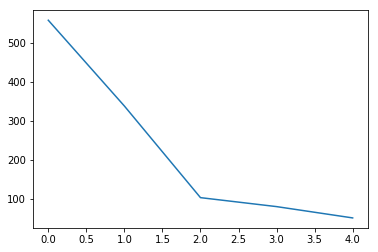

Real Percentage of gain: 37.77488090082261
Percentage of gain: 2.504948457786899e-05
Total gain: 0.0283560165421477
000000000000000000000000000000000000000000000000
Percentile:  0
[[224  88]
 [204  42]]
0.4767025089605735
Percentile:  1
[[103  15]
 [137  83]]
0.5502958579881657
Percentile:  2
[[14 17]
 [48 24]]
0.36893203883495146
Percentile:  3
[[ 2 13]
 [32 33]]
0.4375
Percentile:  4
[[ 0  0]
 [21 30]]
0.5882352941176471
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6529035107087657
0.7376325088339223
F1,score 0.136986301369863
G-score: 0.25495354578882123
Accuracy 0.2765017667844523
Window: 140
[[248  49]
 [770  65]]
Vol pos 3.0139622500155268
Vol neg 4.844718448110589


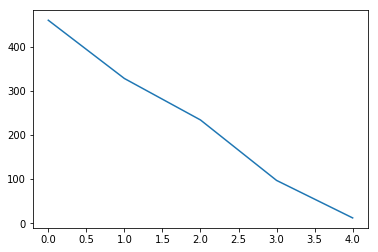

Real Percentage of gain: -345.0654955667902
Percentage of gain: -2.671779350483845
Total gain: -3024.4542247477125
000000000000000000000000000000000000000000000000
Percentile:  0
[[145  25]
 [250  40]]
0.40217391304347827
Percentile:  1
[[ 56   4]
 [250  18]]
0.22560975609756098
Percentile:  2
[[ 28  10]
 [188   7]]
0.15021459227467812
Percentile:  3
[[18  9]
 [70  0]]
0.18556701030927836
Percentile:  4
[[ 0  1]
 [11  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5880195599022005
0.6748166259168704
F1,score 0.6655231560891939
G-score: 0.3251138726418115
Accuracy 0.5232273838630807
Window: 140
[[ 20 113]
 [ 82 194]]
Vol pos 1.3080296069511126
Vol neg 0.8692954084480666


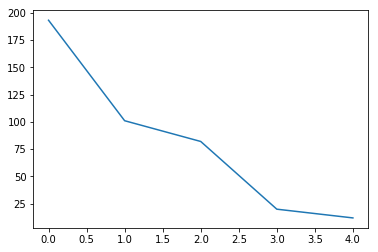

Real Percentage of gain: 57.74938989048934
Percentage of gain: 0.26994066317888776
Total gain: 110.4057312401651
000000000000000000000000000000000000000000000000
Percentile:  0
[[18 81]
 [34 63]]
0.413265306122449
Percentile:  1
[[ 1 25]
 [21 51]]
0.5306122448979592
Percentile:  2
[[ 1  6]
 [22 53]]
0.6585365853658537
Percentile:  3
[[ 0  0]
 [ 5 14]]
0.7368421052631579
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.714569536423841
0.6528268551236749
F1,score 0.1213653603034134
G-score: 0.25355777081692854
Accuracy 0.38604240282685515
Window: 140
[[389   4]
 [691  48]]
Vol pos 2.1305532981965025
Vol neg 2.9580876454556333


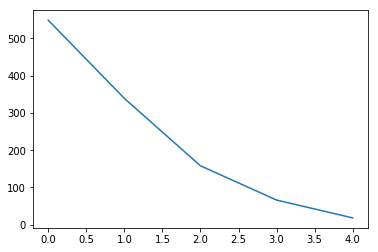

Real Percentage of gain: -241.1169098462543
Percentage of gain: -0.9936564684450474
Total gain: -1124.8191222797936
000000000000000000000000000000000000000000000000
Percentile:  0
[[266   1]
 [269  13]]
0.5081967213114754
Percentile:  1
[[ 78   0]
 [248  13]]
0.26843657817109146
Percentile:  2
[[ 23   2]
 [121  12]]
0.22151898734177214
Percentile:  3
[[22  1]
 [34  9]]
0.4696969696969697
Percentile:  4
[[ 0  0]
 [17  1]]
0.05555555555555555
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5365422830646942
0.7190812720848057
F1,score 0.701397712833545
G-score: 0.48432860419176954
Accuracy 0.5848056537102474
Window: 140
[[110 208]
 [262 552]]
Vol pos 1.7707991117258595
Vol neg 2.076391717393371


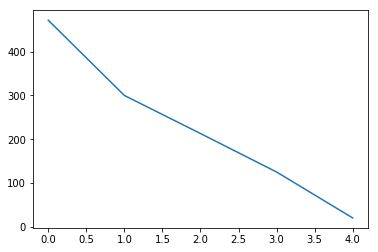

Real Percentage of gain: 148.07818844729917
Percentage of gain: 0.1734672303777691
Total gain: 196.3649047876346
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 72  91]
 [ 87 222]]
0.6228813559322034
Percentile:  1
[[ 18  37]
 [ 82 163]]
0.6033333333333334
Percentile:  2
[[  6  20]
 [ 70 117]]
0.5774647887323944
Percentile:  3
[[13 43]
 [23 46]]
0.472
Percentile:  4
[[ 1 16]
 [ 0  3]]
0.2
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6904393905939501
0.6740282685512368
F1,score 0.5682782018659881
G-score: 0.5853871640997275
Accuracy 0.5503533568904594
Window: 140
[[288  81]
 [428 335]]
Vol pos 2.44056228611224
Vol neg 2.561913829815958


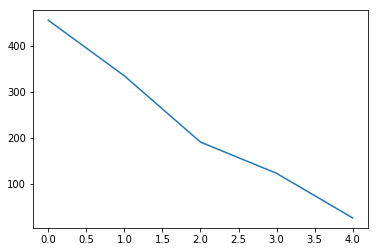

Real Percentage of gain: -41.46524469202767
Percentage of gain: 0.19121569334947247
Total gain: 216.45616487160282
000000000000000000000000000000000000000000000000
Percentile:  0
[[171  37]
 [170  77]]
0.545054945054945
Percentile:  1
[[105  25]
 [ 96 109]]
0.6388059701492538
Percentile:  2
[[ 5  9]
 [98 80]]
0.4427083333333333
Percentile:  3
[[ 4  6]
 [59 53]]
0.4672131147540984
Percentile:  4
[[ 3  4]
 [ 4 15]]
0.6923076923076923
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.502539191874586
0.6369257950530035
F1,score 0.5648286140089419
G-score: 0.46491591584394987
Accuracy 0.4840989399293286
Window: 140
[[169 242]
 [342 379]]
Vol pos 3.610310559431767
Vol neg 2.7062431706858345


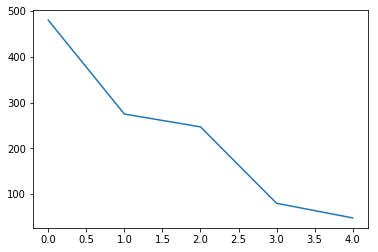

Real Percentage of gain: 34.79343432314061
Percentage of gain: 0.35159379407074276
Total gain: 398.0041748880808
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 67 139]
 [150 124]]
0.39791666666666664
Percentile:  1
[[37 88]
 [66 84]]
0.44
Percentile:  2
[[ 20   5]
 [ 85 137]]
0.6356275303643725
Percentile:  3
[[12  5]
 [32 31]]
0.5375
Percentile:  4
[[32  5]
 [ 9  2]]
0.7083333333333334
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.704635761589404
0.7164310954063604
F1,score 0.5991316931982633
G-score: 0.5106921135917606
Accuracy 0.5106007067137809
Window: 140
[[164 157]
 [397 414]]
Vol pos 3.165179590085976
Vol neg 2.625421466735986


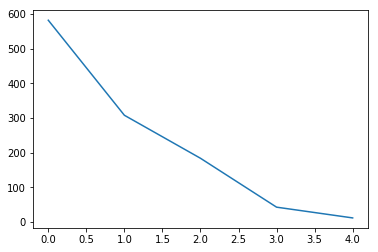

Real Percentage of gain: -44.39215887339343
Percentage of gain: 0.3312635251748742
Total gain: 374.9903104979576
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 64  73]
 [231 214]]
0.47766323024054985
Percentile:  1
[[ 32  19]
 [130 127]]
0.5162337662337663
Percentile:  2
[[62 58]
 [30 34]]
0.5217391304347826
Percentile:  3
[[ 6  7]
 [ 5 25]]
0.7209302325581395
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.47747349823321555
0.49469964664310956
F1,score 0.6833654463712268
G-score: 0.42155639030833136
Accuracy 0.5644876325088339
Window: 140
[[107 465]
 [ 28 532]]
Vol pos 2.8985403658918405
Vol neg 3.640457900137378


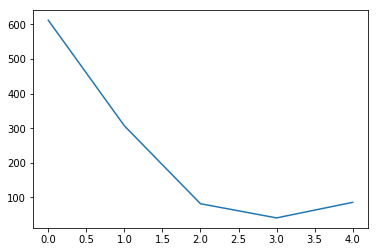

Real Percentage of gain: -88.23239649440887
Percentage of gain: 0.050725750032825694
Total gain: 57.421549037158684
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 55 274]
 [ 27 256]]
0.5081699346405228
Percentile:  1
[[ 35  68]
 [  1 203]]
0.7752442996742671
Percentile:  2
[[ 1 11]
 [ 0 70]]
0.8658536585365854
Percentile:  3
[[ 2 39]
 [ 0  0]]
0.04878048780487805
Percentile:  4
[[13 73]
 [ 0  0]]
0.1511627906976744
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6527593818984547
0.676678445229682
F1,score 0.28571428571428575
G-score: 0.38921198316712713
Accuracy 0.3948763250883392
Window: 140
[[310  56]
 [629 137]]
Vol pos 1.333311924171454
Vol neg 1.4819382845160738


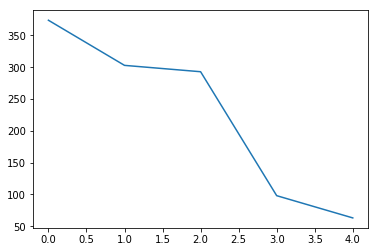

Real Percentage of gain: -136.5713994988616
Percentage of gain: -0.3702626279053627
Total gain: -419.1372947888706
000000000000000000000000000000000000000000000000
Percentile:  0
[[150  38]
 [162  23]]
0.46380697050938335
Percentile:  1
[[ 84  13]
 [173  33]]
0.38613861386138615
Percentile:  2
[[ 63   5]
 [187  38]]
0.3447098976109215
Percentile:  3
[[12  0]
 [76 10]]
0.22448979591836735
Percentile:  4
[[ 0  0]
 [31 32]]
0.5079365079365079
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47770419426048566
0.6855123674911661
F1,score 0.5958158995815899
G-score: 0.6144732049386928
Accuracy 0.573321554770318
Window: 140
[[293  63]
 [420 356]]
Vol pos 3.931484044255098
Vol neg 2.5414653725587306


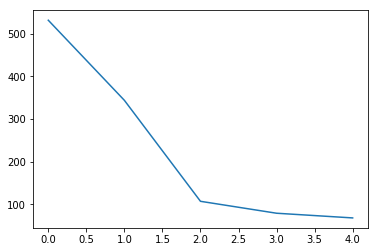

Real Percentage of gain: 77.12484957882056
Percentage of gain: 1.169616051038597
Total gain: 1324.0053697756916
000000000000000000000000000000000000000000000000
Percentile:  0
[[188  45]
 [195 104]]
0.5488721804511278
Percentile:  1
[[ 44   4]
 [203  93]]
0.39825581395348836
Percentile:  2
[[ 5 12]
 [18 72]]
0.719626168224299
Percentile:  3
[[11  0]
 [ 4 64]]
0.9493670886075949
Percentile:  4
[[44  2]
 [ 0 22]]
0.9705882352941176
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.47023911854822353
Mean gain over portfolio :  -89.36684311440474
Real mean gain over portfolio -36.65854829556701


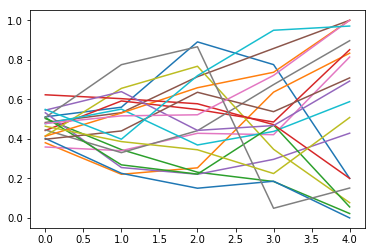

In [7]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

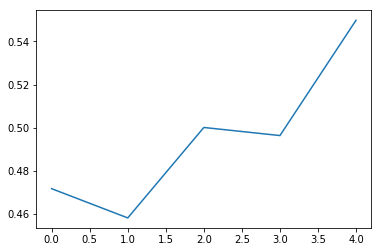

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.270476249727803
0.0052039966694373985
Diff in tren train and test
0.5548862115127176
0.6080357142857142
F1,score 0.5591054313099042
G-score: 0.5051919863435796
Accuracy 0.5071428571428571
Window: 200
[[218 221]
 [331 350]]
Vol pos 4.29243061215613
Vol neg 4.088802808787619


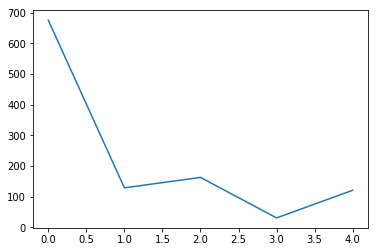

Real Percentage of gain: -3.759168197525192
Percentage of gain: 0.1616798546909962
Total gain: 181.08143725391574
000000000000000000000000000000000000000000000000
Percentile:  0
[[107 173]
 [173 221]]
0.486646884272997
Percentile:  1
[[37 37]
 [30 25]]
0.4806201550387597
Percentile:  2
[[69  8]
 [52 34]]
0.6319018404907976
Percentile:  3
[[ 5  3]
 [ 8 15]]
0.6451612903225806
Percentile:  4
[[ 0  0]
 [67 54]]
0.4462809917355372
000000000000000000000000000000000000000000000000
Working on... AMZN
11.321930760535398
0.0025179720253285087
Diff in tren train and test
0.7125641597857622
0.8303571428571429
F1,score 0.21414913957934992
G-score: 0.34335803011158084
Accuracy 0.26607142857142857
Window: 200
[[186   4]
 [818 112]]
Vol pos 2.0442229708715627
Vol neg 3.1846368154042217


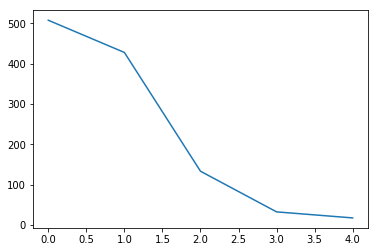

Real Percentage of gain: -265.44017428550626
Percentage of gain: -1.7933866222701291
Total gain: -2008.5930169425446
000000000000000000000000000000000000000000000000
Percentile:  0
[[184   4]
 [268  52]]
0.4645669291338583
Percentile:  1
[[  2   0]
 [399  27]]
0.06775700934579439
Percentile:  2
[[  0   0]
 [119  14]]
0.10526315789473684
Percentile:  3
[[ 0  0]
 [23  9]]
0.28125
Percentile:  4
[[0 0]
 [8 9]]
0.5294117647058824
000000000000000000000000000000000000000000000000
Working on... PEP
7.1599283011352295
0.0
Diff in tren train and test
0.31081608746583367
0.9765625
F1,score 0.022151898734177212
G-score: 0.1058300524425836
Accuracy 0.034375
Window: 200
[[ 15   0]
 [618   7]]
Vol pos 0.49095144126864754
Vol neg 2.800341460840543


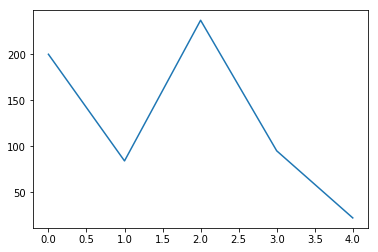

Real Percentage of gain: -178.11180061209652
Percentage of gain: -2.6872032673305397
Total gain: -1719.8100910915455
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 15   0]
 [180   5]]
0.1
Percentile:  1
[[ 0  0]
 [82  2]]
0.023809523809523808
Percentile:  2
[[  0   0]
 [237   0]]
0.0
Percentile:  3
[[ 0  0]
 [95  0]]
0.0
Percentile:  4
[[ 0  0]
 [22  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.972699216586207
0.0019559137050855525
Diff in tren train and test
0.6355724168712341
0.6625
F1,score 0.7085927770859278
G-score: 0.4103432811787743
Accuracy 0.5821428571428572
Window: 200
[[ 83 295]
 [173 569]]
Vol pos 3.7890201477203416
Vol neg 2.944444334254348


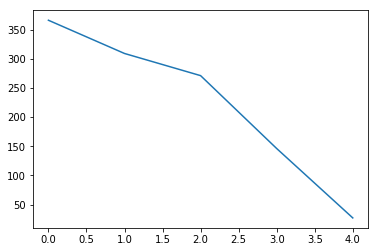

Real Percentage of gain: 86.06162409441006
Percentage of gain: 0.9753939177523463
Total gain: 1092.441187882628
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 44 134]
 [ 62 125]]
0.46301369863013697
Percentile:  1
[[ 18  80]
 [ 30 181]]
0.6440129449838188
Percentile:  2
[[ 15  77]
 [ 57 122]]
0.5055350553505535
Percentile:  3
[[  6   4]
 [ 23 113]]
0.815068493150685
Percentile:  4
[[ 0  0]
 [ 1 26]]
0.9629629629629629
000000000000000000000000000000000000000000000000
Working on... MSFT
5.8924023311029625
0.0
Diff in tren train and test
0.6749219098616689
0.6848214285714286
F1,score 0.5772418990203466
G-score: 0.4989656930280617
Accuracy 0.49910714285714286
Window: 200
[[176 177]
 [384 383]]
Vol pos 1.8664537618050339
Vol neg 1.7495351076352141


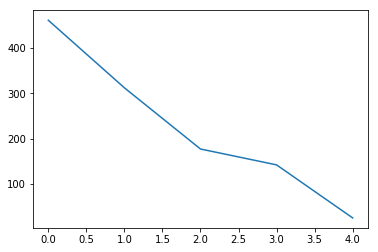

Real Percentage of gain: -29.87586638887755
Percentage of gain: 0.05523076559433824
Total gain: 61.85845746565883
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 94 111]
 [120 136]]
0.49891540130151846
Percentile:  1
[[ 66  58]
 [107  81]]
0.47115384615384615
Percentile:  2
[[15  8]
 [88 66]]
0.4576271186440678
Percentile:  3
[[ 1  0]
 [58 83]]
0.5915492957746479
Percentile:  4
[[ 0  0]
 [ 9 16]]
0.64
000000000000000000000000000000000000000000000000
Working on... FB
12.336073288573756
0.010328444536258126
Diff in tren train and test
0.5437304774654173
0.8705357142857143
F1,score 0.6576923076923078
G-score: 0.5146758656517227
Accuracy 0.5232142857142857
Window: 200
[[ 73  72]
 [462 513]]
Vol pos 4.241085882573177
Vol neg 2.784015280784944


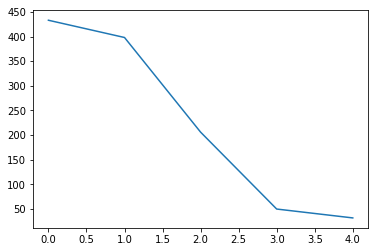

Real Percentage of gain: -10.126855776218935
Percentage of gain: 0.8916180064720732
Total gain: 998.6121672487221
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 73  36]
 [227  98]]
0.39400921658986177
Percentile:  1
[[  0  35]
 [150 212]]
0.5340050377833753
Percentile:  2
[[  0   1]
 [ 81 124]]
0.6019417475728155
Percentile:  3
[[ 0  0]
 [ 3 46]]
0.9387755102040817
Percentile:  4
[[32]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
7.207444473707307
0.0
Diff in tren train and test
0.6316376617581437
0.5767857142857142
F1,score 0.2810077519379845
G-score: 0.33216703645197737
Accuracy 0.3375
Window: 200
[[233 241]
 [501 145]]
Vol pos 1.9660778616932133
Vol neg 2.6814578597243415


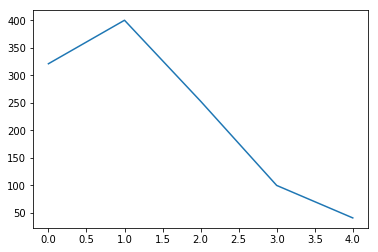

Real Percentage of gain: -201.85223091450678
Percentage of gain: -1.1129145537459169
Total gain: -1246.4643001954269
000000000000000000000000000000000000000000000000
Percentile:  0
[[131  39]
 [126  25]]
0.48598130841121495
Percentile:  1
[[ 69 101]
 [174  56]]
0.3125
Percentile:  2
[[ 28  57]
 [127  41]]
0.2727272727272727
Percentile:  3
[[ 5 18]
 [60 17]]
0.22
Percentile:  4
[[ 0 25]
 [11  5]]
0.12195121951219512
000000000000000000000000000000000000000000000000
Working on... CSCO
6.408313487767918
0.011134617525877858


In [ ]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()